# Import

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy import stats

# Constant declaration

In [92]:
spot_price = 100
strike_price = 100
maturity = 1.0
volatility = 0.2
risk_free_rate = 0.01
nb_sequence = 100000

# Classique Black-Scholes

In [42]:
dividend_yield = 0
d1 = (np.log(spot_price / strike_price) + maturity * (risk_free_rate - dividend_yield + volatility ** 2 / 2)) / (volatility * np.sqrt(maturity))
d2 = d1 - volatility * np.sqrt(maturity)

bs_call_price = spot_price * np.exp(-dividend_yield * maturity) * stats.norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * maturity)* stats.norm.cdf(d2)

print('The Call price with BS is : {}'.format(bs_call_price))

The Call price with BS is : 8.433318690109608


# Classique Monte Carlo

In [111]:
delta_t = maturity
array_of_normal = np.random.normal(0, 1, nb_sequence)

array_of_variation = ((risk_free_rate - ((volatility ** 2) / 2)) * delta_t) + (volatility * np.sqrt(delta_t)* array_of_normal)

array_of_all_prices = spot_price * np.exp(array_of_variation)

array_of_payoff = np.maximum(array_of_all_prices - strike_price, 0)

mean_payoff = np.mean(array_of_payoff)

mc_call_price = mean_payoff * np.exp(-risk_free_rate * maturity)

print('The Call price with MC is : {}'.format(mc_call_price))

The Call price with MC is : 8.367241332161708


In [34]:
print('The error BS-MC = {}'.format(bs_call_price- mc_call_price))

The error BS-MC = 0.236198588345081


# Quasi-Monte Carlo

## Van der Corput

#### B-ary expansion

In [113]:
def b_ary(nb_expansion, base):
    """
    Parameters
    ----------
    nb_expansion : array_like
        The array of expansion series
    base : int
        Base of the expansion
    Returns
    -------
    nb_expansion : array_like
         The nb expansion
    """

    #expansion = nb_expansion.copy()
    list_index_to_increment = np.where(nb_expansion < base - 1)

    if len(list_index_to_increment[0] != 0):
        index_to_increment = list_index_to_increment[0][0]
        nb_expansion[0:index_to_increment] = 0
        nb_expansion[index_to_increment] += 1

    else:
        nb_expansion = nb_expansion * 0
        nb_expansion = np.append(nb_expansion, 1)

    #nb_expansion = expansion
    return nb_expansion


def generate_k_b_ary_expansion(k, base=10):
    """
        Generate an array with k expansion
    :param k: int
        The number of value in the expansion
    :param base: int
        The base of calculation. Default : 10
    :return: array_like
        The array with the k expansion
    """
    nb_exp = np.zeros(int(np.log(k)/np.log(base))+1)
    k_b_ary_expansion = np.array([b_ary(nb_exp, base).copy() for i in range(k)])
    # k_b_ary_expansion = np.array([b_ary(nb_exp, base) for i in range(k)])
    return k_b_ary_expansion

In [114]:
k = 10
test_bary = generate_k_b_ary_expansion(k, 2)

test_bary

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 1., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.]])

#### Van der corput sequence

In [115]:
def van_der_corput_sequence(k, base):
    """
        Calculate the van der corput sequence of k number for the base selected
    :param k: int
        The number of value in the expansion
    :param base: int
        The base of calculation. Default : 10
    :return: array_like
        The list of the Van Der Corput Sequences
    """
    k_b_ary_expansion = generate_k_b_ary_expansion(k, base)
    n = len(k_b_ary_expansion[-1])

    bj = np.linspace(1, n, n)
    bj = 1 / (base ** bj)

    return k_b_ary_expansion.dot(bj)

In [116]:
    k = 10
    base10 = 10
    base2 = 2

    test_b10 = van_der_corput_sequence(k, base10)
    test_b2 = van_der_corput_sequence(k, base2)
    
    print("The Van Der Corput Sequences with base 2 is :\n{}".format(test_b2))
    print()
    print("The Van Der Corput Sequences with base 10 is :\n{}".format(test_b10))

The Van Der Corput Sequences with base 2 is :
[0.5    0.25   0.75   0.125  0.625  0.375  0.875  0.0625 0.5625 0.3125]

The Van Der Corput Sequences with base 10 is :
[0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.01]


# QMC Pricing

In [148]:
nb_sequences = 10000
delta_t = maturity

array_of_rand_VDC_seq = van_der_corput_sequence(nb_sequences, 2)

array_of_normal = scipy.stats.norm.ppf(array_of_rand_VDC_seq)

array_of_variation = ((risk_free_rate - ((volatility ** 2) / 2)) * delta_t) + (volatility * np.sqrt(delta_t)* array_of_normal)

qmc_array_of_all_prices = spot_price * np.exp(array_of_variation)

array_of_payoff = np.maximum(qmc_array_of_all_prices - strike_price, 0)

mean_payoff = np.mean(array_of_payoff)

qmc_call_price = mean_payoff * np.exp(-risk_free_rate * maturity)
print('The Call price with QMC is : {}'.format(qmc_call_price))

The Call price with QMC is : 8.416233295212153


In [119]:
print('The Call price with BS is : {}'.format(bs_call_price))
print('The Call price with MC is : {}'.format(mc_call_price))
print('The Call price with QMC is : {}'.format(qmc_call_price))
print('The error BS-MC = {}'.format(bs_call_price- mc_call_price))
print('The error BS-QMC = {}'.format(bs_call_price- qmc_call_price))

The Call price with BS is : 8.433318690109608
The Call price with MC is : 8.367241332161708
The Call price with QMC is : 8.317019638189603
The error BS-MC = 0.0660773579479006
The error BS-QMC = 0.11629905192000578


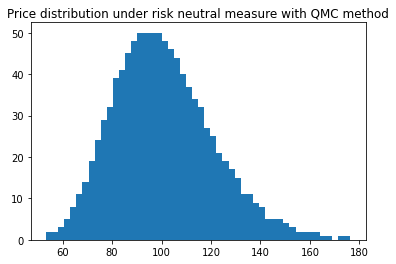

In [41]:
plt.title('Price distribution under risk neutral measure with QMC method')
plt.hist(qmc_array_of_all_prices,50)
plt.show()

# Importance Sampling

#### Risk neutral measure

In [ ]:
n = 10000
S0 = 100
K = 1000000
T = 1.0
sigma = 0.2
r = 0.01

u = np.random.normal(size=n)
is_S_T = S0 * np.exp((r-sigma*sigma/2)*T+sigma*u)

plt.title('Price distribution under risk neutral measure')
plt.hist(is_S_T, 100)
plt.show()

#### Drifting the measure with mu

In [ ]:
u = np.random.normal(size=n)
#mu = 6.95 #(pour k = 100 000)
mu = 9.2104  #(pour k = 1 000 000)
is_S_T_ = S0 * np.exp((mu-sigma*sigma/2)*T+sigma*u)
plt.title('Price distribution under mu drift measure')
plt.hist(is_S_T_,100,color='orange')  
plt.show()

#### Radon-nikodym derivative

In [ ]:
is_radon_nikodym_der = np.exp(-((np.log(is_S_T_/S0)-(r-sigma*sigma/2)*T)**2)/(2*sigma*sigma*T) + ((np.log(is_S_T_/S0)-(mu-sigma*sigma/2)*T)**2)/(2*sigma*sigma*T) + 500 )

# Two types of Calls
is_european_call =  np.mean(np.maximum(is_S_T_ - K ,0)*is_radon_nikodym_der)
is_digital_call = np.mean(np.maximum(is_S_T_ - K,0)*is_radon_nikodym_der*1/(is_S_T_ - K)) 
is_ratio = is_european_call / is_digital_call
print('### Results obtained with Importance Sampling ###')
print('Digital Call : {}'.format(is_digital_call))
print('European Call : {}'.format(is_european_call))


print('Ratio value : {}'.format(is_ratio))

# Importance Sampling with QMC

#### Risk neutral measure

In [ ]:
n = 100000

array_of_rand_VDC_seq = van_der_corput_sequence(n, 2)
u = scipy.stats.norm.ppf(array_of_rand_VDC_seq)
S_T = S0 * np.exp((r-sigma*sigma/2)*T+sigma*u)

plt.title('Price distribution under risk neutral measure with QMC')
plt.hist(S_T, 100)
plt.show()

#### Drift the measure with mu

In [ ]:
u = np.random.normal(size=n)
#mu = 6.95 #(pour k = 100 000)
mu = 9.2104  #(pour k = 1 000 000)
qmc_is_S_T_ = S0 * np.exp((mu-sigma*sigma/2)*T+sigma*u)
plt.title('Price distribution under mu drift measure with QMC')
plt.hist(qmc_is_S_T_,100,color='orange')  
plt.show()

#### Radon-Nikodym Derivative

In [ ]:
qmc_is_radon_nikodym_der = np.exp(-((np.log(qmc_is_S_T_/S0)-(r-sigma*sigma/2)*T)**2)/(2*sigma*sigma*T) + ((np.log(qmc_is_S_T_/S0)-(mu-sigma*sigma/2)*T)**2)/(2*sigma*sigma*T) + 500 )

# Two types of Calls
qmc_is_european_call =  np.mean(np.maximum(qmc_is_S_T_ - K ,0)*qmc_is_radon_nikodym_der)
qmc_is_digital_call = np.mean(np.maximum(qmc_is_S_T_ - K,0)*qmc_is_radon_nikodym_der*1/(qmc_is_S_T_ - K)) 
qmc_is_ratio = qmc_is_european_call / qmc_is_digital_call
print('### Results obtained with QMC in Importance Sampling ###')
print('Digital Call : {}'.format(qmc_is_digital_call))
print('European Call : {}'.format(qmc_is_european_call))


print('Ratio value : {}'.format(qmc_is_ratio))

In [ ]:
print('### Results obtained with Importance Sampling ###')
print('Digital Call : {}'.format(is_digital_call))
print('European Call : {}'.format(is_european_call))
print('Ratio value : {}'.format(is_ratio))
print()
print('### Results obtained with QMC in Importance Sampling ###')
print('Digital Call : {}'.format(qmc_is_digital_call))
print('European Call : {}'.format(qmc_is_european_call))
print('Ratio value : {}'.format(qmc_is_ratio))



In [ ]:
is_qmc_standard_error = stats.sem(qmc_is_S_T_)
print('Standard error of the price with the new dynamic with QMC : {}'.format(is_qmc_standard_error))

In [ ]:
is_standard_error = stats.sem(is_S_T_)
print('Standard error of the price with the new dynamic : {}'.format(is_standard_error))

In [ ]:
is_standard_error = stats.sem(S_T)
print('Standard error of the price with the new dynamic : {}'.format(is_standard_error))